In [1]:
#imports --------------------------
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.preprocessing import image
#from keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen = image.ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True )
train_set = train_datagen.flow_from_directory('dataset/Train/',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1398 images belonging to 4 classes.


In [4]:
test_datagen = image.ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True )
test_set = test_datagen.flow_from_directory('dataset/Test/',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 685 images belonging to 4 classes.


In [5]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))

cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=128, activation=tf.keras.layers.LeakyReLU()))

cnn.add(tf.keras.layers.Dropout(0.3))

cnn.add(tf.keras.layers.Dense(units=64, activation='relu'))

cnn.add(tf.keras.layers.Dropout(0.2))

cnn.add(tf.keras.layers.Dense(units=32, activation='relu'))

cnn.add(tf.keras.layers.Dropout(0.2))

cnn.add(tf.keras.layers.Dense(units=4, activation='softmax'))

In [6]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

cnn.fit(x = train_set, validation_data = test_set, epochs = 40)


Epoch 1/40
44/44 [==============================] - 12s 260ms/step - loss: 1.3829 - accuracy: 0.3465 - val_loss: 0.9083 - val_accuracy: 0.7124
Epoch 2/40
44/44 [==============================] - 12s 278ms/step - loss: 1.0642 - accuracy: 0.5470 - val_loss: 0.6896 - val_accuracy: 0.7226
Epoch 3/40
44/44 [==============================] - 12s 266ms/step - loss: 0.8667 - accuracy: 0.6201 - val_loss: 0.6281 - val_accuracy: 0.7328
Epoch 4/40
44/44 [==============================] - 12s 268ms/step - loss: 0.8195 - accuracy: 0.6262 - val_loss: 0.5076 - val_accuracy: 0.7912
Epoch 5/40
44/44 [==============================] - 12s 269ms/step - loss: 0.7925 - accuracy: 0.6314 - val_loss: 0.6712 - val_accuracy: 0.7153
Epoch 6/40
44/44 [==============================] - 12s 271ms/step - loss: 0.7604 - accuracy: 0.6690 - val_loss: 0.4540 - val_accuracy: 0.8117
Epoch 7/40
44/44 [==============================] - 13s 289ms/step - loss: 0.6843 - accuracy: 0.7123 - val_loss: 0.5443 - val_accuracy: 0.7781

In [7]:
cnn.save('cabelo-save')

INFO:tensorflow:Assets written to: cabelo-save/assets


INFO:tensorflow:Assets written to: cabelo-save/assets


cacheado


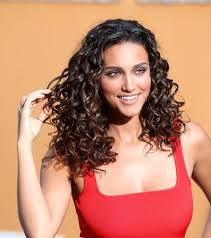

In [15]:
imgPath = 'dataset/Predict/cacheado6.jpg'
test_image = image.load_img(imgPath, target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

if(result[0][0] == max(result[0])):
    print('cacheado')
    
if(result[0][1] == max(result[0])):
    print('careca')
    
if(result[0][2] == max(result[0])):
    print('liso')

if(result[0][3] == max(result[0])):
    print('ondulado')
    

from IPython.display import Image 
pil_img = Image(filename=imgPath)
display(pil_img)